In [44]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [58]:
import pandas as pd
file_path = 'data_2.csv'
columns_to_read = ['PeriodLS', 'type', 'Amplitude','Mean']
data = pd.read_csv(file_path, usecols=columns_to_read)
print(data.head())
print(data['type'])

  type  Amplitude       Mean  PeriodLS
0   EW   0.113478  18.302225  0.009643
1   EW   0.048682  17.159033  0.024958
2   EW   0.236061  17.920287  0.011123
3   EW   0.183929  14.976055  0.010101
4   EW   0.128726  17.361448  0.005353
0       EW
1       EW
2       EW
3       EW
4       EW
        ..
2079    SR
2080    SR
2081    SR
2082    SR
2083    SR
Name: type, Length: 2084, dtype: object


In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


X = data[['PeriodLS', 'Amplitude','Mean']]  
y = data['type']  #  'type' is a target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k = 5  # value for k
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

from sklearn.metrics import accuracy_score, confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.8848920863309353
Confusion Matrix:
[[203  28]
 [ 20 166]]


In [96]:
import seaborn as sns


def to_density(cf):
  '''
  This function will take in a confusion matrix cf and return the relative 'density' of every element in each row.
  ---------
  cf: Confusion matrix to be passed in
  '''
  density = []
  n, k = cf.shape
  for i in range(n):
    density_row = []
    for j in range(k):
      total_stars = sum(cf[i])
      density_row.append(cf[i][j]/total_stars)
    density.append(density_row)
  return np.array(density)


def make_confusion_matrix(cf_,
                          xlabel, ylabel,
                          group_names=None,
                          categories='auto',
                          count=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None,
                          ):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf_:            Confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''

    cf = to_density(cf_)
    
    # Generate the labels for the matrix elements:
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.2f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    box_labels = [f"{v1}{v2}".strip() for v1, v2 in zip(group_labels,group_counts)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # Set figure paramaters:
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # Make the heatmap:
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,yticklabels=categories)

    if xyplotlabels:
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)

    if title:
        plt.title(title)

C:\Users\kaurs\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


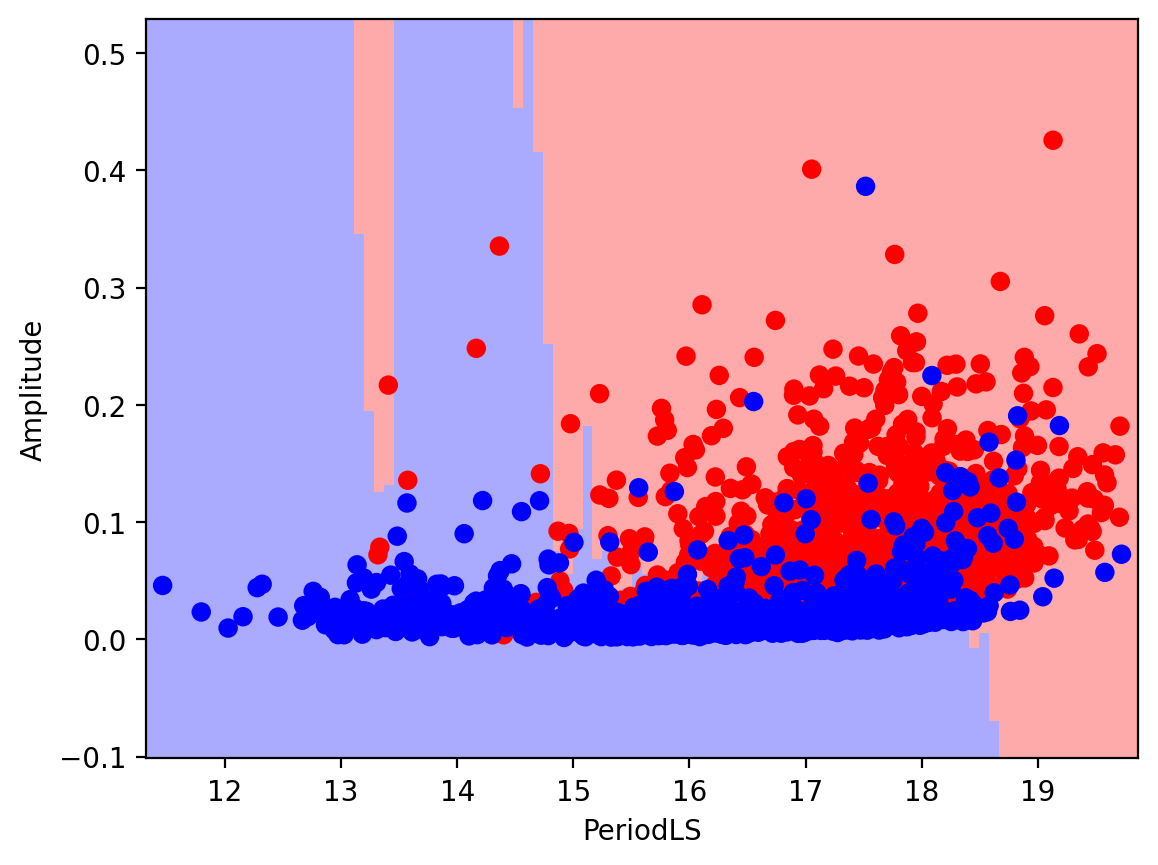

In [107]:
# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

from sklearn.neighbors import KNeighborsClassifier

# Use only the necessary features
X = data[['Mean', 'Amplitude']]
y = data['type']

le = LabelEncoder()
y = le.fit_transform(y) 
# Retrain the classifier
knn = KNeighborsClassifier(n_neighbors=6)  # Adjust n_neighbors as needed
knn.fit(X, y)

# Proceed with the prediction and plotting as before
X_records = X.to_records(index=False)

X_period = X_records['Mean']
X_amplitude = X_records['Amplitude']

x_min, x_max = X_period.min() - 0.1, X_period.max() + 0.1
y_min, y_max = X_amplitude.min() - 0.1, X_amplitude.max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Ensure Z is of numeric type
Z = np.array(Z, dtype=float)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
pl.figure()
pl.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
pl.scatter(X_period, X_amplitude, c=y, cmap=cmap_bold)
pl.xlabel('PeriodLS')
pl.ylabel('Amplitude')
pl.axis('tight')

pl.show()


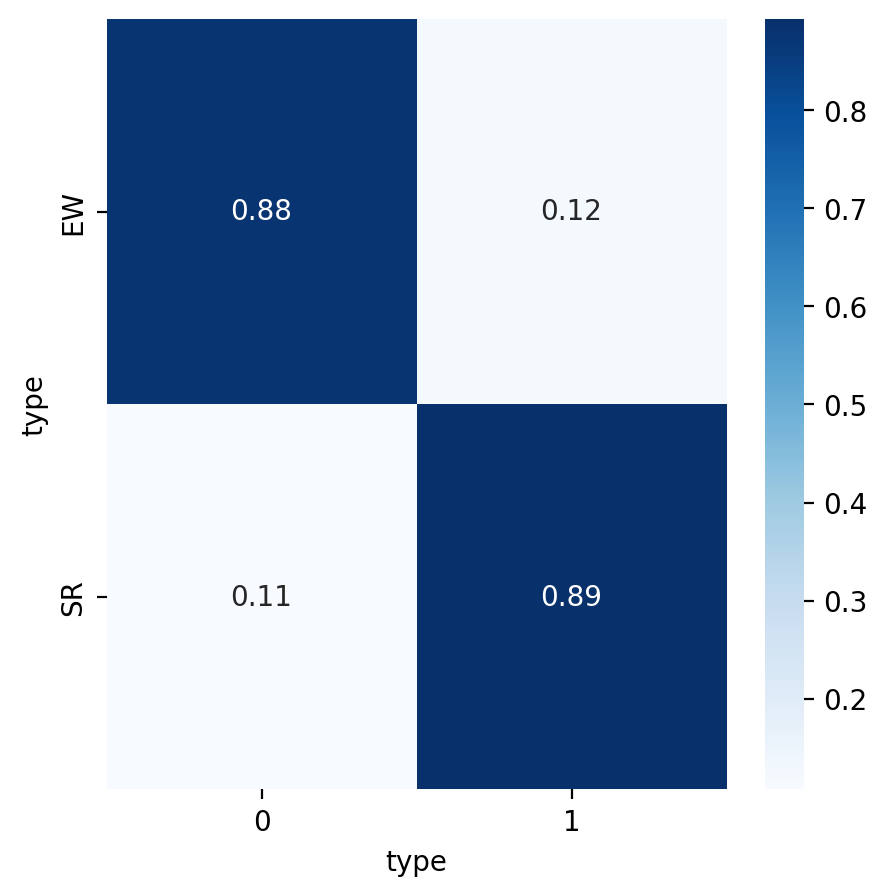

In [64]:
cat = ['EW','SR']
make_confusion_matrix(confusion_matrix(y_test, y_pred), xlabel='type', ylabel='type', categories= cat, count=True, figsize=(5,5))